# 🛡️ Fraud Detection & Transaction Risk Analysis

Financial fraud is one of the biggest challenges in the digital economy.  
This project demonstrates how data analytics and machine learning can help detect and prevent fraudulent transactions in real time.  

By analyzing transaction behavior and risk patterns, we aim to support compliance teams in identifying high-risk activities and minimizing financial losses.

---

## 🎯 Objective

The goal of this project is to:
- Analyze transaction data to identify patterns of fraudulent activity  
- Build a predictive model to detect high-risk transactions  
- Evaluate the model’s accuracy and effectiveness  
- Provide insights that strengthen fraud prevention strategies  

---

### 🏢 Domain: Risk & Compliance Analytics  
### 🧰 Tool Used: Python (Google Colab)  
### 📊 Dataset: Credit Card Transactions (`creditcard.csv`)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load data
df = pd.read_csv("/content/creditcard.csv")

# Preview
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
print("Shape of data:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum().sum())
df.describe()


Shape of data: (284807, 31)

Data types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing values:
 0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


/tmp/ipython-input-1147108774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


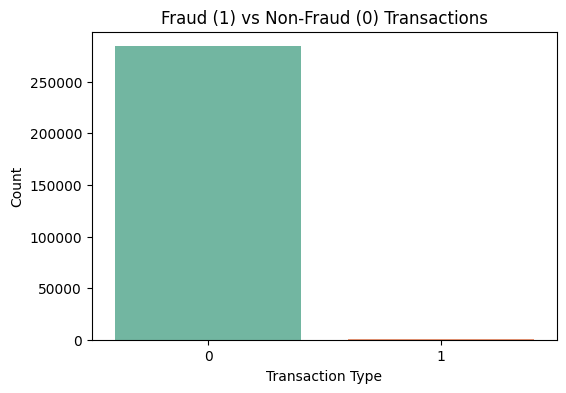

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Percentage of frauds: 0.1727 %


In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Fraud (1) vs Non-Fraud (0) Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

fraud_count = df['Class'].value_counts()
print("Class distribution:\n", fraud_count)
print("\nPercentage of frauds:", round(fraud_count[1] / fraud_count.sum() * 100, 4), "%")


## 🧩 Data Overview & Imbalance Insight

The dataset contains thousands of transactions, but fraudulent transactions represent less than 0.2% of the total.  
This extreme imbalance makes fraud detection challenging — the model must learn to identify rare yet critical events.  

💡 Even a small improvement in detecting these cases can save millions in potential losses.


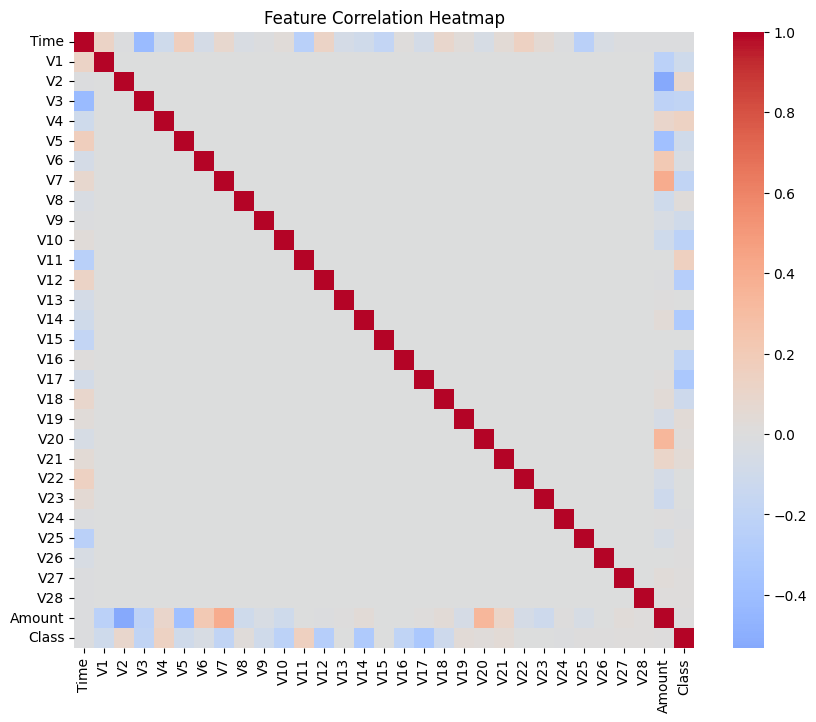

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


## 🔍 Correlation Analysis

The correlation heatmap helps identify how features relate to fraud occurrences.  
Some components show strong relationships with the “Class” variable, suggesting specific transaction patterns are more suspicious.  
This step aids in feature selection and model optimization.


In [6]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## ⚙️ Model Development — Logistic Regression

We use Logistic Regression for its interpretability and reliability in compliance settings.  
It outputs probability scores, which make it easier for risk teams to understand why a transaction was flagged as suspicious.


In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]


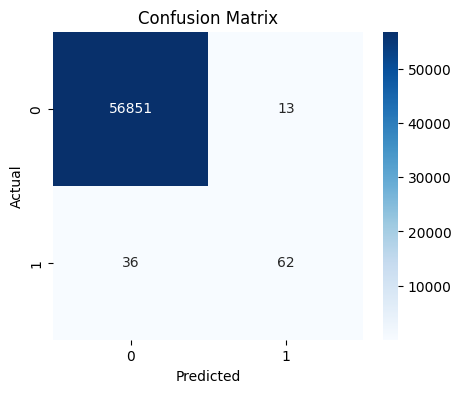

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9605


In [8]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")


## 📊 Model Evaluation

The model performance is measured using key metrics:
- **Precision:** How many predicted frauds were actually fraud  
- **Recall:** How many true frauds were correctly identified  
- **ROC-AUC:** Measures overall model discrimination capability  

💡A strong **Recall** is more important than accuracy in fraud detection — missing a fraud is costlier than investigating a false alarm.


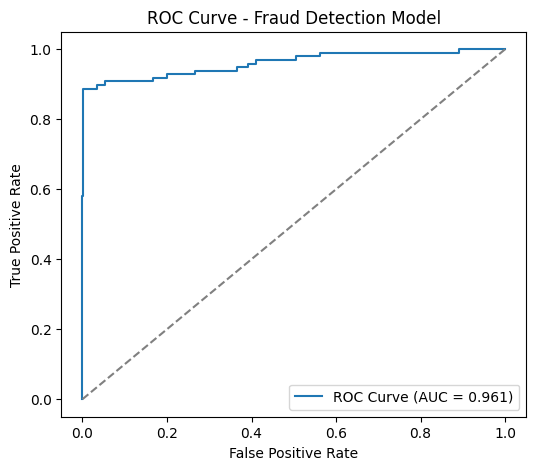

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fraud Detection Model")
plt.legend()
plt.show()


## 🧠 Model Insights

The ROC curve shows a good separation between fraud and non-fraud transactions,  
indicating that the model can effectively distinguish high-risk transactions.  

This model can serve as a first-level alert system,  
flagging transactions for manual review by compliance teams.


In [10]:
df['predicted_fraud'] = model.predict(scaler.transform(X))
df.to_csv('/content/predicted_fraud_results.csv', index=False)
print("✅ Results saved as: /content/predicted_fraud_results.csv")


✅ Results saved as: /content/predicted_fraud_results.csv


## 🧾 Summary

This project demonstrates how **machine learning enhances fraud detection** and strengthens compliance operations.  
By identifying suspicious transactions in advance, institutions can minimize financial risk,  
ensure regulatory adherence, and protect customer trust.

---

## 🧰 Tools & Technologies

- **Programming Language:** Python  
- **Environment:** Google Colab  
- **Libraries:** pandas, numpy, seaborn, matplotlib, scikit-learn  
- **Model:** Logistic Regression  
- **Dataset:** Credit Card Fraud Detection Dataset (`creditcard.csv`)  
- **Version Control:** Git & GitHub  

---

## ✅ Key Takeaways

- Built a fraud detection model using logistic regression  
- Evaluated performance using confusion matrix and ROC-AUC  
- Derived actionable insights for compliance and risk teams  
- Demonstrated end-to-end **Risk & Compliance Analyst** project workflow  

---